In [14]:
import sys
import os

# Add to path for imports
sys.path.insert(0, "../../src/")

# My module imports
from simulation_methods.spatial_pp import SPP_HomPoisson, SPP_Thomas, SPP_LGCP
from periodogram_methods.periodogram import Periodogram

# External module imports
import numpy as np
from gstools import Exponential

# Bartlett Periodogram plots - <font color='red'>untapered </font> 

## Poisson process

Simulating HPP...
Iteration: 1 of 1000
Iteration: 101 of 1000
Iteration: 201 of 1000
Iteration: 301 of 1000
Iteration: 401 of 1000
Iteration: 501 of 1000
Iteration: 601 of 1000
Iteration: 701 of 1000
Iteration: 801 of 1000
Iteration: 901 of 1000
Computing periodograms...
Iteration: 1 of 1000
Iteration: 101 of 1000
Iteration: 201 of 1000
Iteration: 301 of 1000
Iteration: 401 of 1000
Iteration: 501 of 1000
Iteration: 601 of 1000
Iteration: 701 of 1000
Iteration: 801 of 1000
Iteration: 901 of 1000


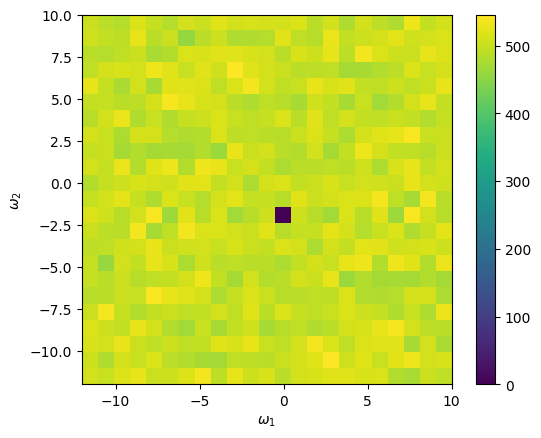

In [13]:
# Instantiate Homogeneous Poisson class (default on [-1/2,1/2]^2)
pois = SPP_HomPoisson()

# Simulate 1000 realisations of the Poisson process
lambda_hom = 500
pois_spps = []
print("Simulating HPP...")
for i in range(1000):
    if i % 100 == 0:
        print(f"Iteration: {i+1} of 1000")
    pois_spps.append(pois.simSPP(lambdaHom=lambda_hom))

# Plot periodogram
per = Periodogram(freq_min=-12, freq_max=11, freq_step=1)
per.computeAveragePeriodogram(pois_spps)
per.plot(average=True)

## Thomas process

Simulating Thomas process...
Iteration: 1 of 1000
Iteration: 11 of 1000
Iteration: 21 of 1000
Iteration: 31 of 1000
Iteration: 41 of 1000
Iteration: 51 of 1000
Iteration: 61 of 1000
Iteration: 71 of 1000
Iteration: 81 of 1000
Iteration: 91 of 1000
Iteration: 101 of 1000
Iteration: 111 of 1000
Iteration: 121 of 1000
Iteration: 131 of 1000
Iteration: 141 of 1000
Iteration: 151 of 1000
Iteration: 161 of 1000
Iteration: 171 of 1000
Iteration: 181 of 1000
Iteration: 191 of 1000
Iteration: 201 of 1000
Iteration: 211 of 1000
Iteration: 221 of 1000
Iteration: 231 of 1000
Iteration: 241 of 1000
Iteration: 251 of 1000
Iteration: 261 of 1000
Iteration: 271 of 1000
Iteration: 281 of 1000
Iteration: 291 of 1000
Iteration: 301 of 1000
Iteration: 311 of 1000
Iteration: 321 of 1000
Iteration: 331 of 1000
Iteration: 341 of 1000
Iteration: 351 of 1000
Iteration: 361 of 1000
Iteration: 371 of 1000
Iteration: 381 of 1000
Iteration: 391 of 1000
Iteration: 401 of 1000
Iteration: 411 of 1000
Iteration: 421 o

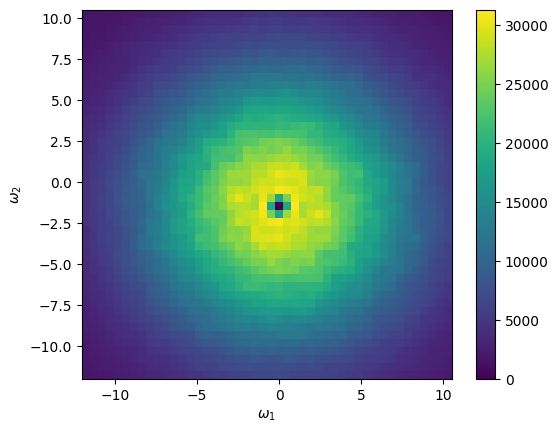

In [11]:
# Thomas theoretical 
def thomas_theo(rho, K, sigma, p, q):
    return rho * K * (1 + K * np.exp(-(p ** 2 + q ** 2) * (sigma ** 2)))

# Instantiate Thomas process class (default on [-1/2,1/2]^2)
thom = SPP_Thomas()

# Simulate 100 realisations of the Thomas process
N_runs = 1000
thom_spps = []
print("Simulating Thomas process...")
for i in range(N_runs):
    if i % 10 == 0:
        print(f"Iteration: {i+1} of {N_runs}")
    thom_spps.append(thom.simSPP(rho=50, K=25, sigma=0.02, 
                                 cov=np.array([[1, 0], [0, 1]]), 
                                 enlarge=1.25))

# Plot periodogram
per = Periodogram(freq_min=-12, freq_max=11, freq_step=1/2)
per.computeAveragePeriodogram(thom_spps, verbose=10)
per.plot(average=True)


## LGCP

In [16]:
lgcp = SPP_LGCP(step_size=0.02)
lgcp_spps = []
N_runs = 100
for i in range(N_runs):
    if i % 10 == 0:
        print(f"Iteration: {i+1} of {N_runs}")
    lgcp_spps.append(lgcp.simSPP(
        Exponential, {'dim': 2, 'var': 0.1, 'len_scale': 0.5}, 4)
        )
    
per = Periodogram(freq_min=-5, freq_max=6, freq_step=0.1)

per.computeAveragePeriodogram(lgcp_spps, verbose=10)
per.plot(average=False)

Iteration: 1 of 100


KeyboardInterrupt: 

# Periodogram plots - <font color='red'>tapered </font> 

## Poisson process

## Thomas process

## LGCP